## Testing TF-IDF

In [95]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import re
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform
from utils import preprocess_corpus 
from scipy.cluster.hierarchy import linkage, dendrogram 


In [96]:
# Configuration
corpus_dir_name = 'fairy_tales_texts'
sim_threshold = 0.7 
stop_words = list(stopwords.words('english'))

In [97]:
#Setup and handling 
def get_corpus_path(dir_name):
    base_dir = os.getcwd()
    corpus_path = os.path.join(base_dir, dir_name)
    return corpus_path

In [98]:
#Create corpus 
def load_corpus(corpus_path):
    documents = []
    filenames = []
    file_paths = glob.glob(os.path.join(corpus_path, "*.txt"))
    #print(file_paths)
    for filepath in file_paths: 
        filename = os.path.basename(filepath)
        with open(filepath, 'r', encoding='utf-8') as f:
            documents.append(f.read())
            filenames.append(filename) 
    print(f"\nSuccessfully loaded {len(documents)} total documents.")
    return documents, filenames

In [99]:
def create_corpus(documents, stop_words_set = stop_words):
    cleaned_documents = []
    #stop_words_set = set(stop_words)
    
    for document in documents:
        #Lowercase and remove punctuation 
        text = document.lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        #tokenize word
        tokens = text.split()
        #filter stop words
        clean_tokens = [w for w in tokens if w.isalpha() and w not in stop_words_set]
        #rejoin tokens 
        cleaned_str = " ".join(clean_tokens)
        cleaned_documents.append(cleaned_str)
        
    return cleaned_documents

In [100]:
def calculate_document_similarity(documents, filenames):
    vectorizer = TfidfVectorizer(
        token_pattern=r'[a-z]+', 
        lowercase=True
    )
    #Fit and transform cleanned documents
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    print(f"Total vocabulary size used: {len(feature_names)}")

    document_sim = cosine_similarity(tfidf_matrix)
    return document_sim, vectorizer

In [109]:
def plot_dendrogram(similarity_matrix, labels):
    distances =  1 - similarity_matrix
    np.fill_diagonal(distances, 0.0) 

    condensed_distances = squareform(distances)
    Z = linkage(condensed_distances, 'ward')

    plt.figure(figsize=(8, 12))
    plt.title('Dendrogram: Hans Christen Andersen folk tales similarity', fontsize= 13)
    plt.xlabel('Story titles', fontsize=11)
    plt.ylabel('Distance (1 - Cosine similarity)', fontsize=11)

    # Plot the dendrogram
    dendrogram(
        Z,
        leaf_rotation=0.,  
        leaf_font_size=10., 
        labels=labels,     
        orientation='right',   
        color_threshold=0.8, 
    )
    # Adjust layout to prevent label overlap
    plt.tight_layout()
    plt.show()


Successfully loaded 67 total documents.
Total vocabulary size used: 7654


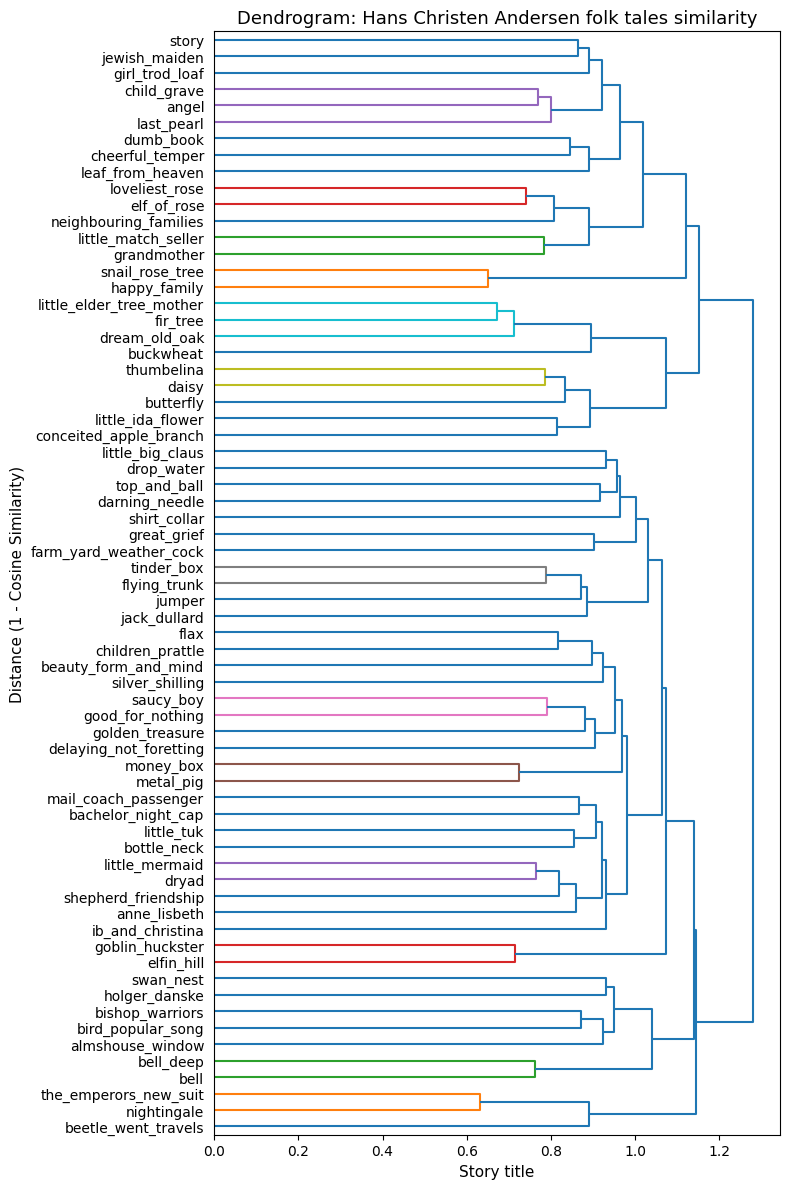

67


In [110]:
if __name__ == "__main__":
    try:
        corpus_path = get_corpus_path(corpus_dir_name)
        documents, filenames = load_corpus(corpus_path)
        cleaned_documents = create_corpus(documents, stop_words_set = stop_words)

        story_labels = [file.replace('.txt', '') for file in filenames]

        doc_similarity_matrix, vectorizer = calculate_document_similarity(
            cleaned_documents, 
            story_labels)
        
        plot_dendrogram(doc_similarity_matrix, story_labels)
            
    except Exception as e: 
        print(e)
    print(len(documents))